In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("HCLTECH.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.00,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
5296,2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.30,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
5297,2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.90,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
5298,2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.30,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706


In [3]:
data=df["Prev Close"]
data.index=pd.to_datetime(df["Date"])

data=data['2013-01-01':'2013-12-2']

In [4]:
data.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

In [5]:
#Data Exploration

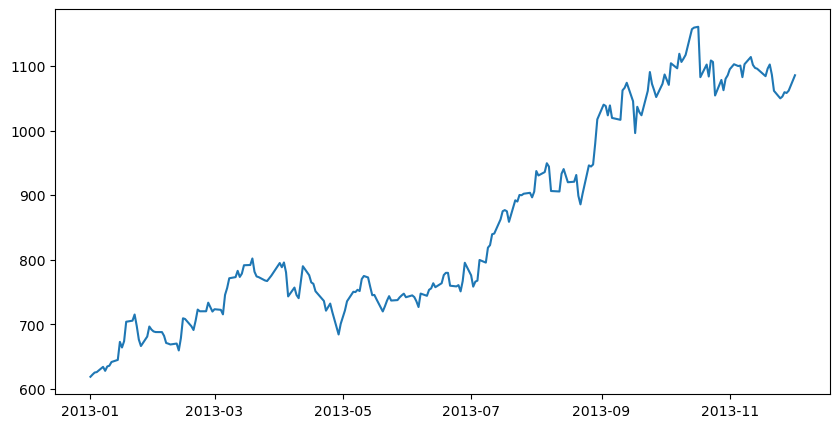

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data)

In [7]:
#Rolling Statistic

In [8]:
rolmean=data.rolling(12).mean()
rolstd=data.rolling(12).std()

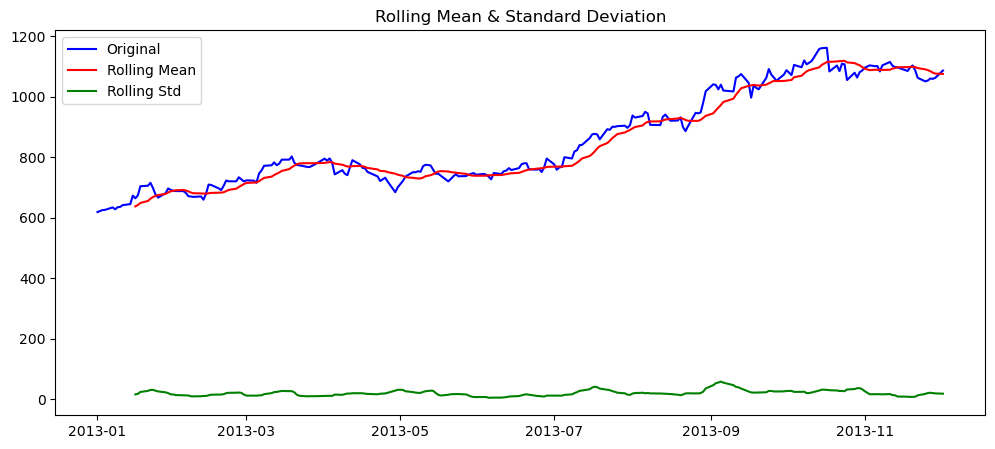

In [9]:
plt.figure(figsize=(12,5))
org=plt.plot(data,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="green",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
dftest=adfuller(data,autolag="AIC")
dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","Lags Used","No. of Observations"])
for k,v in dftest[4].items():
    dfoutput["Critical Value(%s)"%k]=v

print("The Results of Dickey-Fuller test:")
print("")
print(dfoutput)

The Results of Dickey-Fuller test:

Test Statistic          -0.815744
p-value                  0.814453
Lags Used                0.000000
No. of Observations    229.000000
Critical Value(1%)      -3.459233
Critical Value(5%)      -2.874245
Critical Value(10%)     -2.573541
dtype: float64


In [12]:
#conditions
#p value should be always less than 5%
#critical value should be more than test statistic

#for our data both conditions dosen't matches
#so here we cannot reject null hypothesis and we can say that our data is non stationery

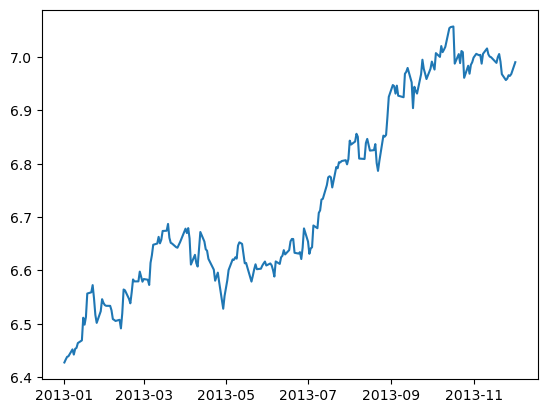

In [13]:
#Lets try transformation

data_log=np.log(data)
plt.plot(data_log)

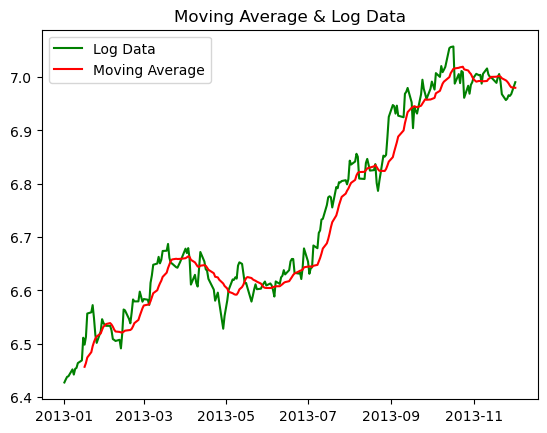

In [14]:
moving_avg=data_log.rolling(12).mean()
moving_std=data_log.rolling(12).std()
plt.figure()
plt.plot(data_log,color="green",label="Log Data")
plt.plot(moving_avg,color="red",label="Moving Average")
plt.legend(loc="best")
plt.title("Moving Average & Log Data")
plt.show()

In [15]:
logdata_minus_movingavg=data_log-moving_avg
logdata_minus_movingavg

Date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
                ...   
2013-11-26   -0.031957
2013-11-27   -0.022226
2013-11-28   -0.019082
2013-11-29   -0.012617
2013-12-02    0.010459
Name: Prev Close, Length: 230, dtype: float64

In [16]:
logdata_minus_movingavg.dropna(inplace=True)
logdata_minus_movingavg.head()

Date
2013-01-16    0.041457
2013-01-17    0.048848
2013-01-18    0.082393
2013-01-21    0.074654
2013-01-22    0.076989
Name: Prev Close, dtype: float64

In [17]:
#Creating a function of dickey-fuller test and rolling statistics

In [18]:
def test_stationery(timeseries):
    #Rolling Statistics
    moving_avg=timeseries.rolling(12).mean()
    moving_std=timeseries.rolling(12).std()
    
    plt.figure(figsize=(12,5))
    org=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(moving_avg,color="red",label="Rolling Mean")
    std=plt.plot(moving_std,color="green",label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()
    
    #Dickey-Fuller Test
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","Lags Used","No. of Observations"])
    for k,v in dftest[4].items():
        dfoutput["Critical Value(%s)"%k]=v
    
    print("The Results of Dickey-Fuller test:")
    print("")
    print(dfoutput)

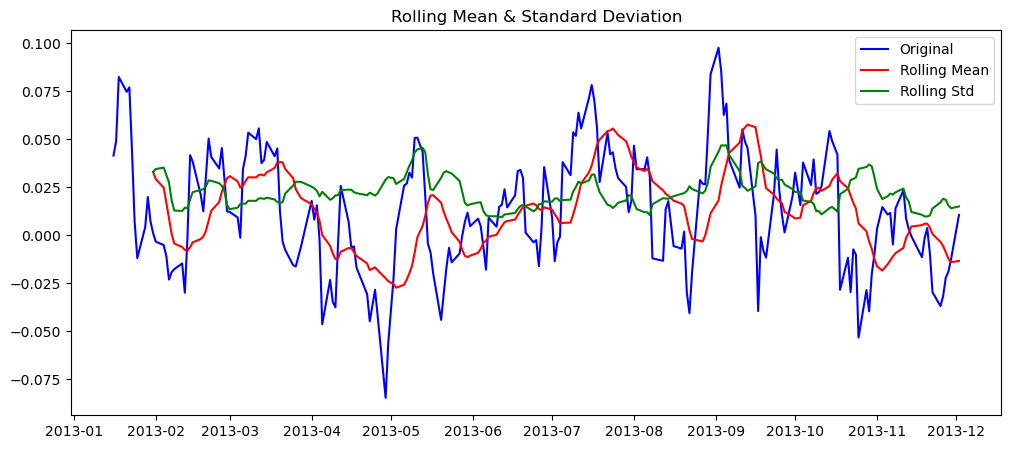

The Results of Dickey-Fuller test:

Test Statistic          -3.391954
p-value                  0.011236
Lags Used               10.000000
No. of Observations    208.000000
Critical Value(1%)      -3.462186
Critical Value(5%)      -2.875538
Critical Value(10%)     -2.574231
dtype: float64


In [19]:
test_stationery(logdata_minus_movingavg)

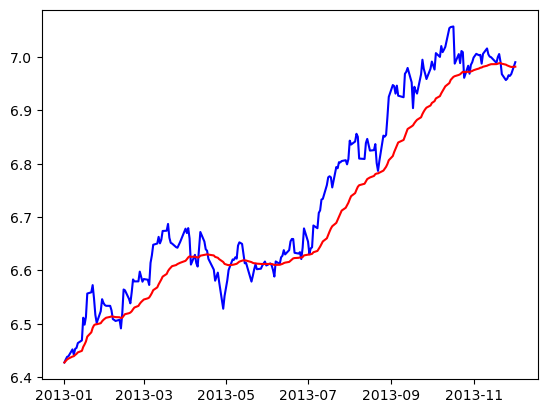

In [20]:
exp_weighted_avg=data_log.ewm(halflife=12).mean()
plt.plot(data_log,color="blue")
plt.plot(exp_weighted_avg,color="red")

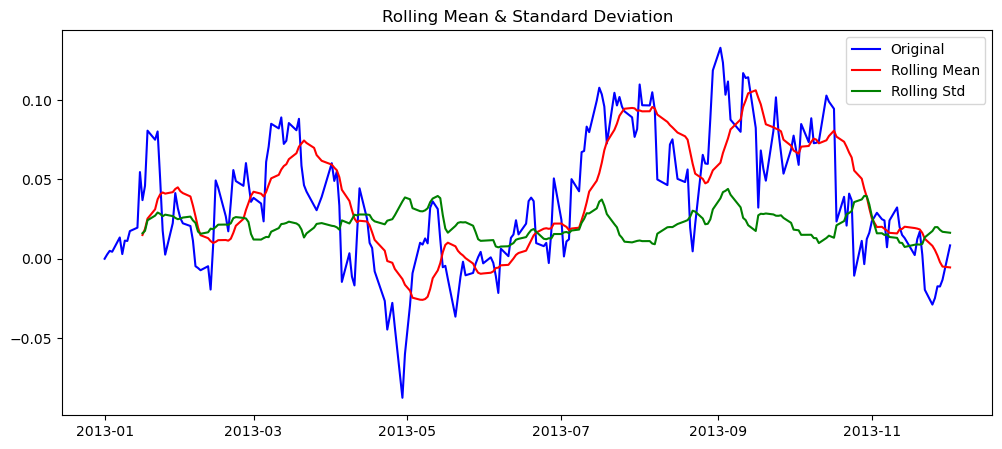

The Results of Dickey-Fuller test:

Test Statistic          -3.462864
p-value                  0.008994
Lags Used                0.000000
No. of Observations    229.000000
Critical Value(1%)      -3.459233
Critical Value(5%)      -2.874245
Critical Value(10%)     -2.573541
dtype: float64


In [21]:
logdata_minus_weightedavg=data_log-exp_weighted_avg
test_stationery(logdata_minus_weightedavg)

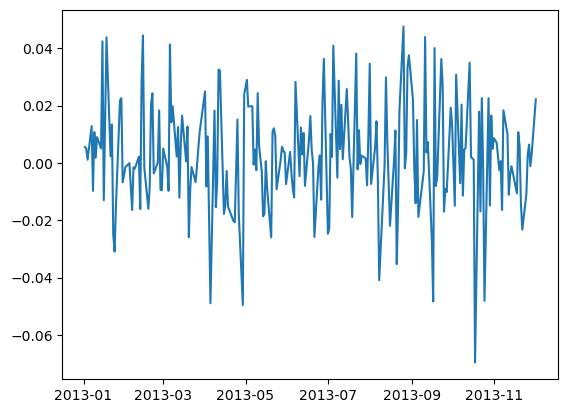

In [22]:
data_log_shift=data_log-data_log.shift()
plt.plot(data_log_shift)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

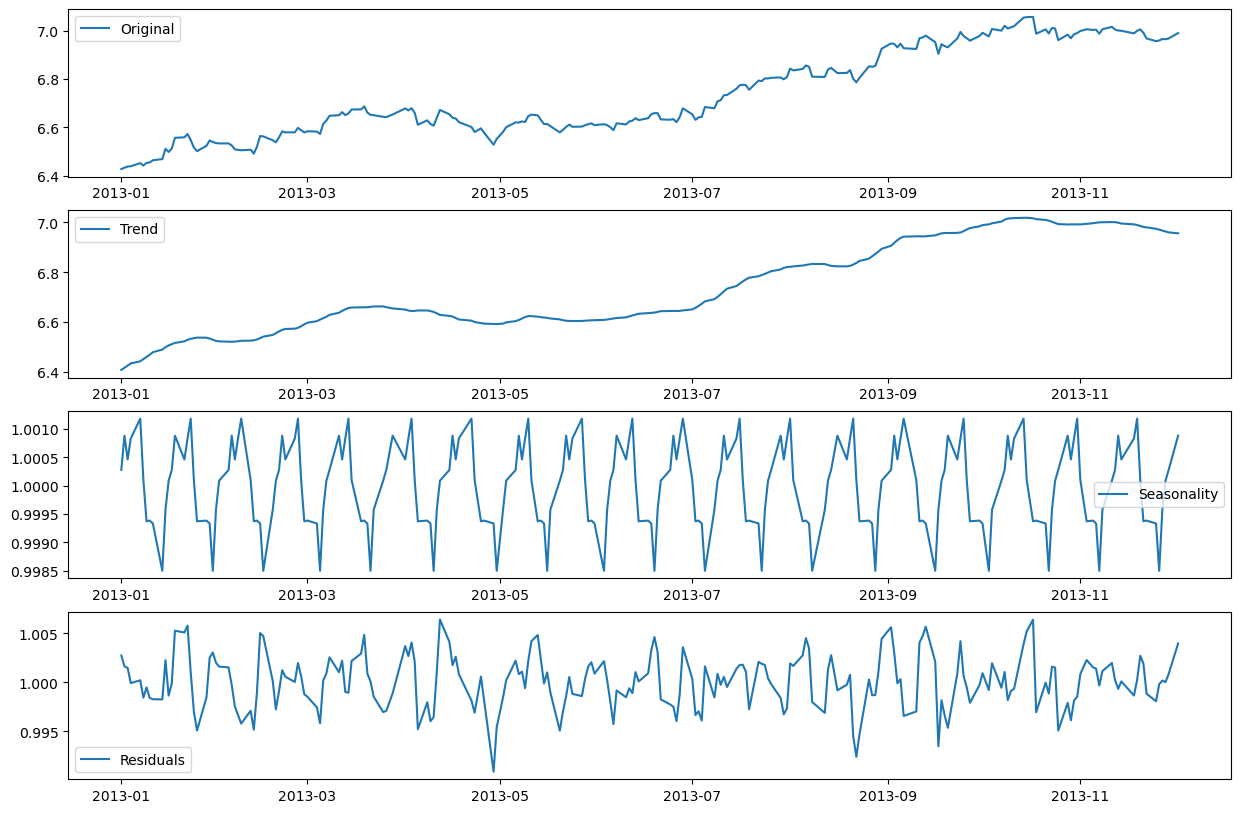

In [24]:
decomposition = seasonal_decompose(data_log,period=12,extrapolate_trend=1,model="multiplicative")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,10))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

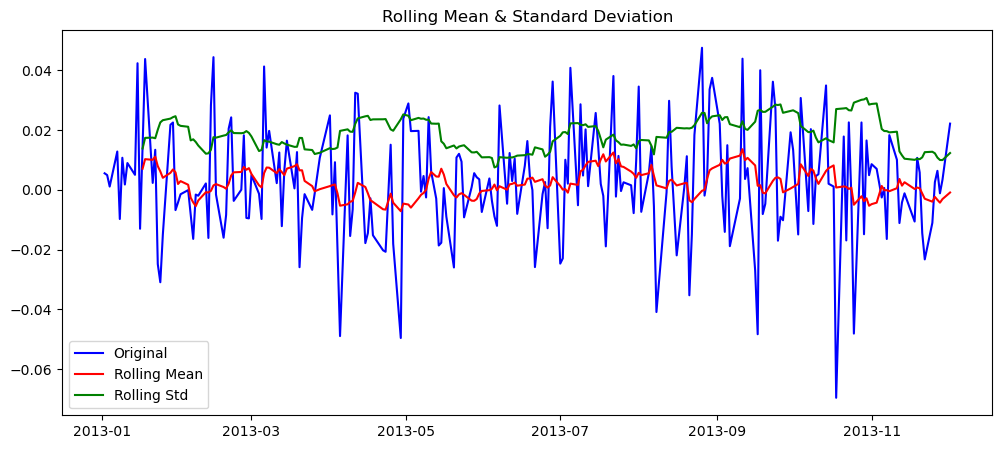

The Results of Dickey-Fuller test:

Test Statistic        -1.181434e+01
p-value                8.709941e-22
Lags Used              1.000000e+00
No. of Observations    2.270000e+02
Critical Value(1%)    -3.459490e+00
Critical Value(5%)    -2.874358e+00
Critical Value(10%)   -2.573602e+00
dtype: float64


In [25]:
data_log_shift.dropna(inplace=True)
test_stationery(data_log_shift)

In [26]:
data.sort_index(inplace= True)

In [27]:
#ACF & PACF plots

In [28]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [29]:
lag_acf = acf(data_log_shift, nlags=20)
lag_pacf = pacf(data_log_shift, nlags=20)

Text(0.5, 1.0, 'Partial Auto correlation graph')

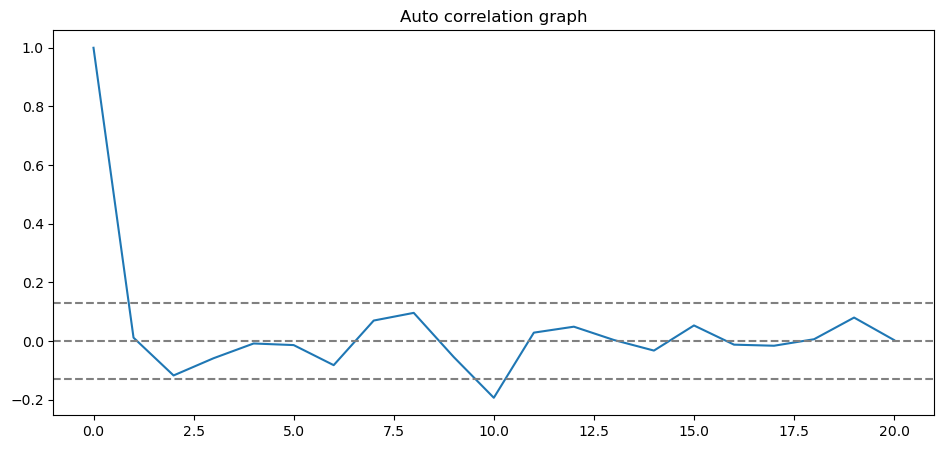

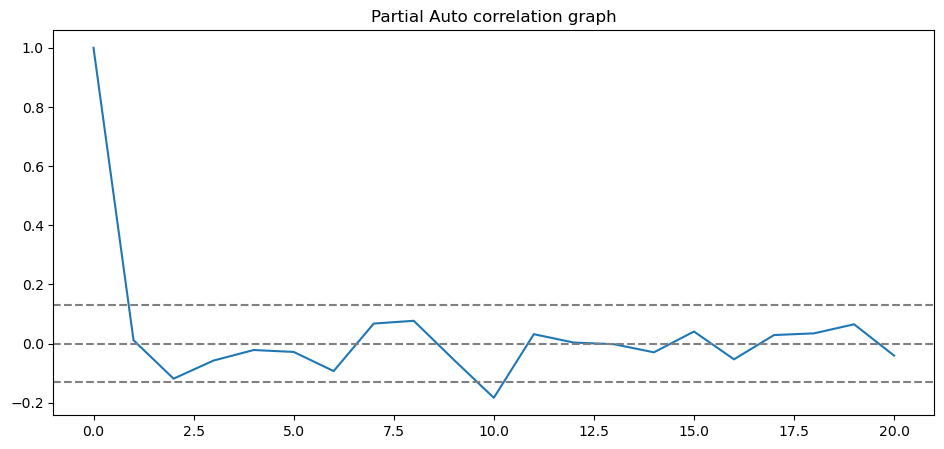

In [30]:
#plot ACF
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle="--",color="gray")
plt.title("Auto correlation graph")

#plot PACF
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle="--",color="gray")
plt.title("Partial Auto correlation graph")

In [31]:
data_log_shift = data_log_shift[~data_log_shift.isnull()]

In [32]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

Plotting ARIMA Model


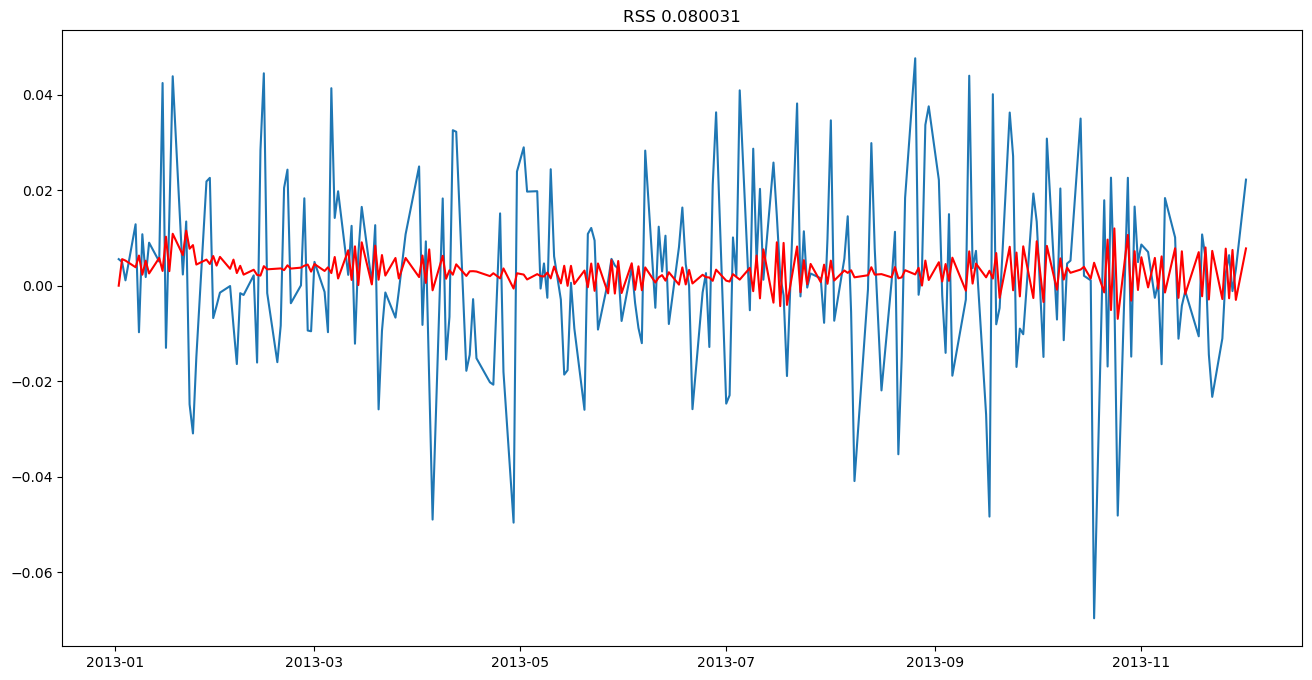

In [33]:
plt.figure(figsize=(16,8))
model = ARIMA(data_log_shift, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(data_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title("RSS %4f"% sum((results_ARIMA.fittedvalues-data_log_shift)**2))
print("Plotting ARIMA Model")

In [34]:
#Taking results back to 0riginal scale

In [35]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005253
2013-01-07    0.003864
2013-01-08    0.006309
dtype: float64


In [36]:
#cumulative sum 
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010814
2013-01-07    0.014678
2013-01-08    0.020986
dtype: float64


In [37]:
ARIMA_log_prediction = pd.Series(data_log.iloc[0], index=data_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438435
2013-01-07    6.442298
dtype: float64

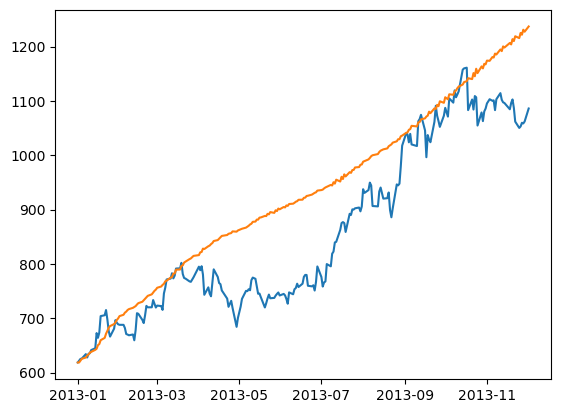

In [38]:
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(data)
plt.plot(predictions_ARIMA)

In [39]:
results_ARIMA.predict(10,20)

Date
2013-01-16    0.010255
2013-01-17    0.003043
2013-01-18    0.010871
2013-01-21    0.006416
2013-01-22    0.011504
2013-01-23    0.007738
2013-01-24    0.008499
2013-01-25    0.004419
2013-01-28    0.005463
2013-01-29    0.004544
2013-01-30    0.006207
Name: predicted_mean, dtype: float64